#  Global Interpretations with Skater

In [18]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [19]:
interpreter = Interpretation(training_data=X_test, training_labels=y_test, feature_names=list(data.columns))
im_model = InMemoryModel(xgc.predict_proba, examples=X_train, target_names=['$50K or less', 'More than $50K'])

## Feature Importances with Skater

Feature importance is generic term for the degree to which a predictive model relies on a particular feature. The skater feature importance implementation is based on an information theoretic criteria, measuring the entropy in the change of predictions, given a perturbation of a given feature. The intuition is that the more a model's decision criteria depend on a feature, the more we'll see predictions change as a function of perturbing a feature. The default method used is `prediction-variance` which is the mean absolute value of changes in predictions, given perturbations in the data.

2018-10-30 21:20:05,700 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[12/12] features ████████████████████ Time elapsed: 12 seconds

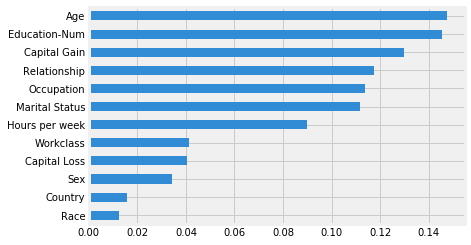

In [23]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True, n_samples=23000)

## Partial Dependence

Partial Dependence describes the marginal impact of a feature on model prediction, holding other features in the model constant. The derivative of partial dependence describes the impact of a feature (analogous to a feature coefficient in a regression model). This has been adapted from _T. Hastie, R. Tibshirani and J. Friedman, Elements of Statistical Learning Ed. 2, Springer_.  2009. 

The partial dependence plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. PDPs can show if the relationship between the target and a feature is linear, monotonic or more complex. Skater can show 1-D as well as 2-D PDPs

### PDP of 'Age' affecting model prediction

Looks like the middle-aged people have a slightly higher chance of making more money as compared to younger or older people

2018-10-30 21:49:42,333 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[44/44] grid cells ████████████████████ Time elapsed: 20 seconds

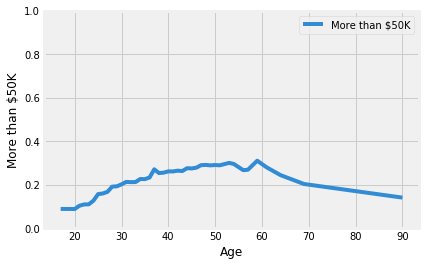

In [42]:
r = interpreter.partial_dependence.plot_partial_dependence(['Age'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

### PDP of 'Education Num' affecting model prediction

Looks like higher the education level, the better the chance of making more money. Not surprising!

2018-10-30 21:49:14,095 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[16/16] grid cells ████████████████████ Time elapsed: 9 seconds

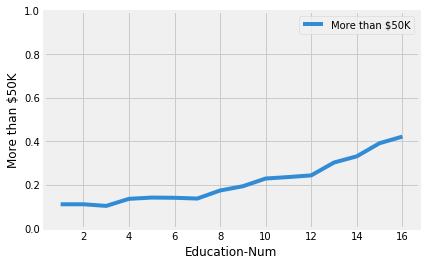

In [41]:
r = interpreter.partial_dependence.plot_partial_dependence(['Education-Num'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

### PDP of 'Capital Gain' affecting model prediction

Unsurprisingly higher the capital gain, the more chance of making money, there is a steep rise in around \$5K - $8K

2018-10-30 21:58:26,363 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[6/6] grid cells ████████████████████ Time elapsed: 6 seconds

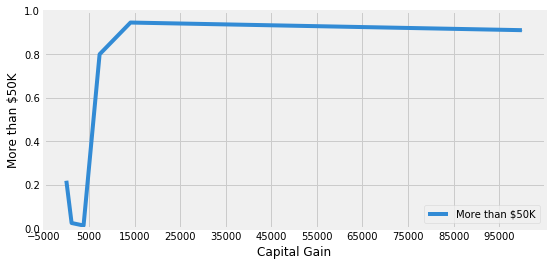

In [52]:
r = interpreter.partial_dependence.plot_partial_dependence(['Capital Gain'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), 
                                                           with_variance=True, figsize = (8, 4), n_samples=23000)
yl = r[0][1].set_ylim(0, 1) 
s, e = r[0][1].get_xlim()
xl = r[0][1].set_xticks(np.arange(s, e, 10000))

### PDP of 'Relationship' affecting model prediction

Remember that relationship is coded as a categorical variable with numeric representations. Let's first look at how it is represened.

In [43]:
pd.concat([data_disp[['Relationship']], data[['Relationship']]], axis=1).drop_duplicates()

,Relationship,Relationship
0,Not-in-family,1
1,Husband,0
4,Wife,5
12,Own-child,3
17,Unmarried,4
74,Other-relative,2


Interesting definitely that married folks (husband-wife) have a higher chance of making more money than others!

2018-10-30 21:50:53,947 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[6/6] grid cells ████████████████████ Time elapsed: 5 seconds

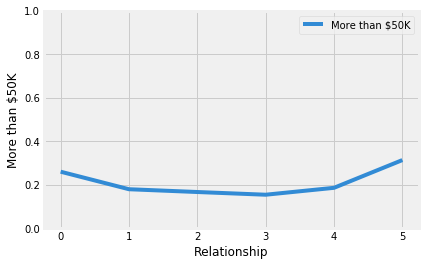

In [44]:
r = interpreter.partial_dependence.plot_partial_dependence(['Relationship'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

### Two-way PDP showing interactions between features 'Age' and 'Education-Num' and their effect on making more than \$50K

We run a deeper model interpretation here over all the data samples, trying to see interactions between `Age` and `Education-Num`and also their effect on the probability of the model predicting if the person will make more money, with the help of a two-way partial dependence plot.

Interesting to see higher the education level and the middle-aged folks (30-50) having the highest chance of making more money!

2018-10-30 22:04:17,745 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[1136/1136] grid cells ████████████████████ Time elapsed: 629 seconds

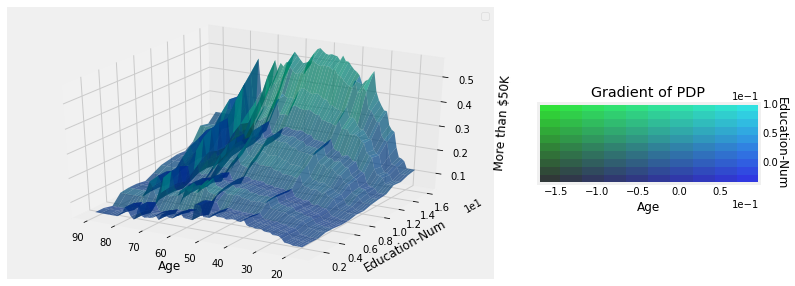

In [54]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Age', 'Education-Num')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)

### Two-way PDP showing interactions between features 'Education-Num' and 'Capital Gain' and their effect on making more than \$50K

We run a deeper model interpretation here over all the data samples, trying to see interactions between `Education-Num` and `Capital Gain`and also their effect on the probability of the model predicting if the person will make more money, with the help of a two-way partial dependence plot.

Basically having a better education and more capital gain leads to you making more money!

2018-10-30 22:24:37,401 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[160/160] grid cells ████████████████████ Time elapsed: 89 seconds

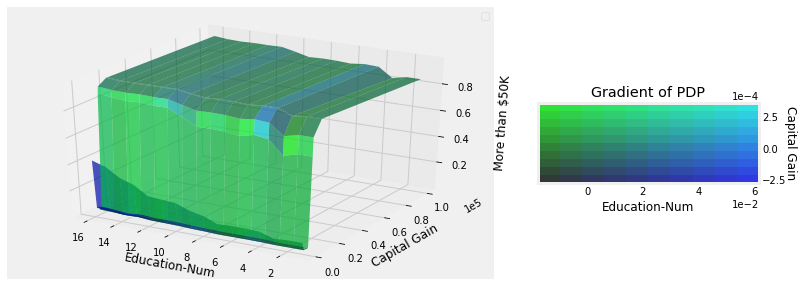

In [56]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Education-Num', 'Capital Gain')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)